# Required librarys
- pandas
- numpy
- matplotlib
- seaborn
- scipy stats
- zipfile

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr , spearmanr
from zipfile import ZipFile

# Unzip large dataframe onto local computer

In [20]:
file_name = 'ctydata.csv.zip'

with ZipFile(file_name, 'r') as zip:
    zip.printdir()

    zip.extractall()


File Name                                             Modified             Size
ctydata.csv                                    2023-02-18 17:00:54    130023715


# Set values to be used in machine learning model

In [21]:
values = ['year', 'county', 'state', 'povrate', 'wagesal_percap', 'trans_gov_pc', 'trans_medicare_pc', 'oldfrac',  'totalpop', 'trans_medicaid_pc', 'unemprate']


dataframe = pd.read_csv('ctydata.csv')
ky_state = dataframe.query('state == 21')

df = dataframe[values]
kentucky = ky_state[values]

df = df.rename(columns={'year' : 'Year',
                                                  'county' : 'County',
                                                  'state' : 'State',
                                                  'povrate' : 'Poverty Rate',
                                                  'wagesal_percap' : 'Wages and Salary per Capita',
                                                  'trans_gov_pc' : 'Government Transfers per Capita',
                                                  'trans_medicare_pc' : 'Medicare Transfers per Capita',
                                                  'oldfrac' : 'Share of Population 65+',
                                                  'totalpop' : 'Total Population',
                                                  'trans_medicaid_pc' : 'Medicaid Transfers per Capita',
                                                  'unemprate' : 'Unemployment Rate'})

kentucky = kentucky.rename(columns={'year' : 'Year',
                                                  'county' : 'County',
                                                  'state' : 'State',
                                                  'povrate' : 'Poverty Rate',
                                                  'wagesal_percap' : 'Wages and Salary per Capita',
                                                  'trans_gov_pc' : 'Government Transfers per Capita',
                                                  'trans_medicare_pc' : 'Medicare Transfers per Capita',
                                                  'oldfrac' : 'Share of Population 65+',
                                                  'totalpop' : 'Total Population',
                                                  'trans_medicaid_pc' : 'Medicaid Transfers per Capita',
                                                  'unemprate' : 'Unemployment Rate'})

/var/folders/02/lzvd5scj4zb274qzdzm7r7p80000gn/T/ipykernel_62277/1569726019.py:4: DtypeWarning: Columns (492) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('ctydata.csv')


# Clean Data and set datetime and fill void values

In [22]:
kentucky.drop(kentucky[kentucky['Year'] == '2002'].index, inplace=True)

In [23]:
df['Date'] = pd.to_datetime(df['Year'], format='%Y')
kentucky['Date'] = pd.to_datetime(kentucky['Year'], format='%Y')

df.drop('Year', inplace=True, axis=1)
kentucky.drop('Year', inplace=True, axis=1)

kentucky = kentucky.fillna(kentucky['Poverty Rate'].mean())

# Create Poverty Rate Average from 2003 - 2019

In [24]:
kentucky_mean_pov = kentucky['Poverty Rate'].mean()
kentucky['Above Average Poverty Mean'] = (kentucky['Poverty Rate'] - kentucky_mean_pov) > 0

# Vizulazations for Poverty Rate in relation to values

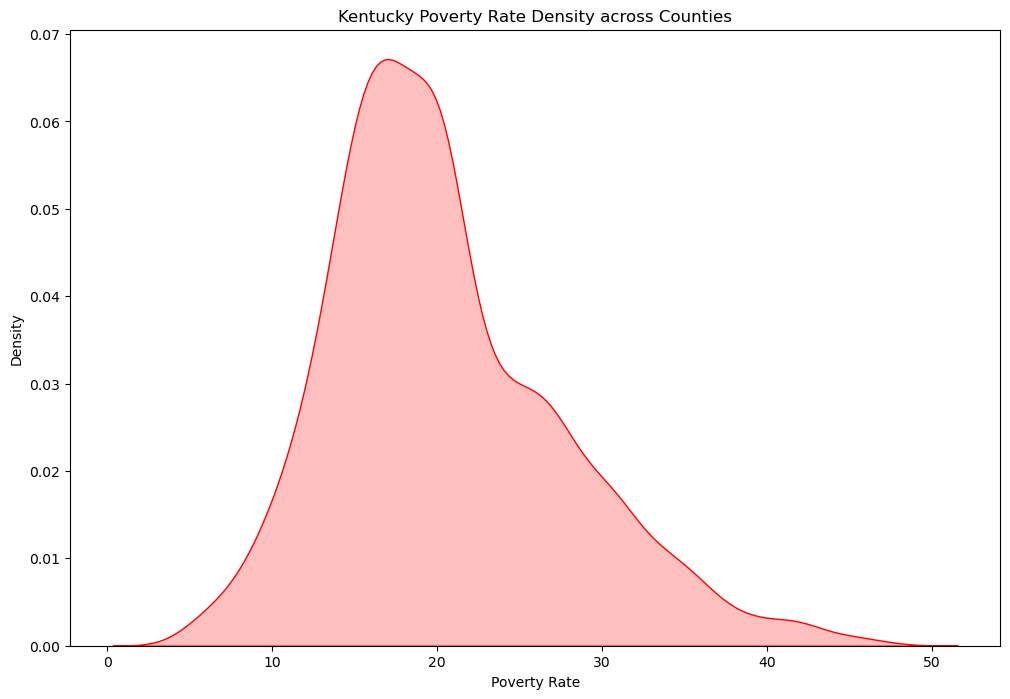

In [25]:
plt.figure(figsize=(12,8))

sns.kdeplot(x= 'Poverty Rate',
            data= kentucky,
             shade=True,
             color='red')

plt.title('Kentucky Poverty Rate Density across Counties')

plt.show()

<AxesSubplot:xlabel='Date', ylabel='Above Average Poverty Mean'>

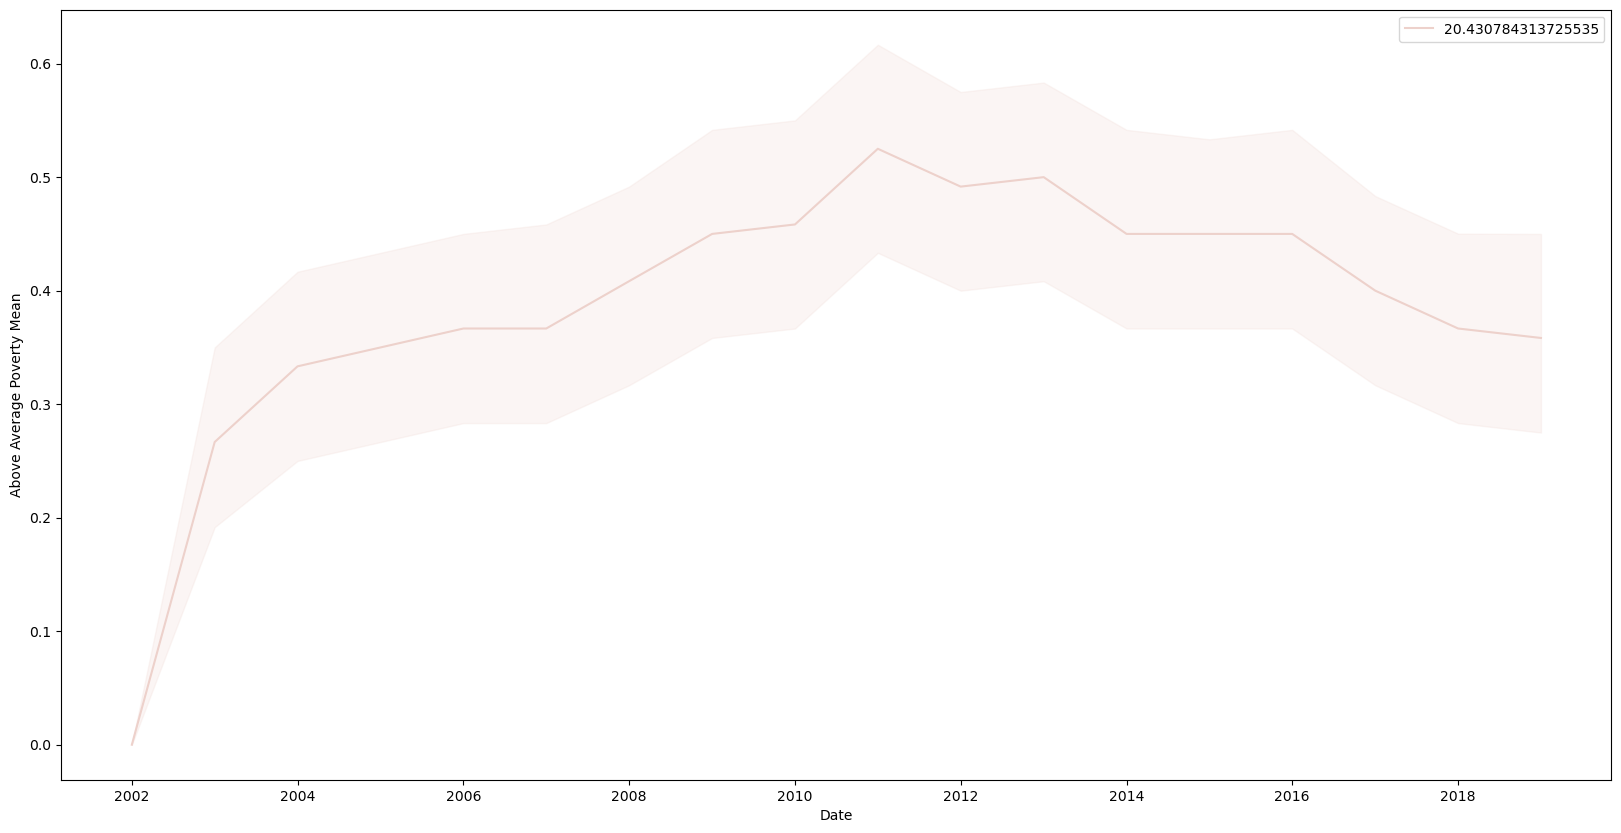

In [36]:
plt.figure(figsize=(20,10))

sns.lineplot(x= 'Date',
             y= 'Above Average Poverty Mean',
             hue = kentucky_mean_pov,
             data = kentucky)

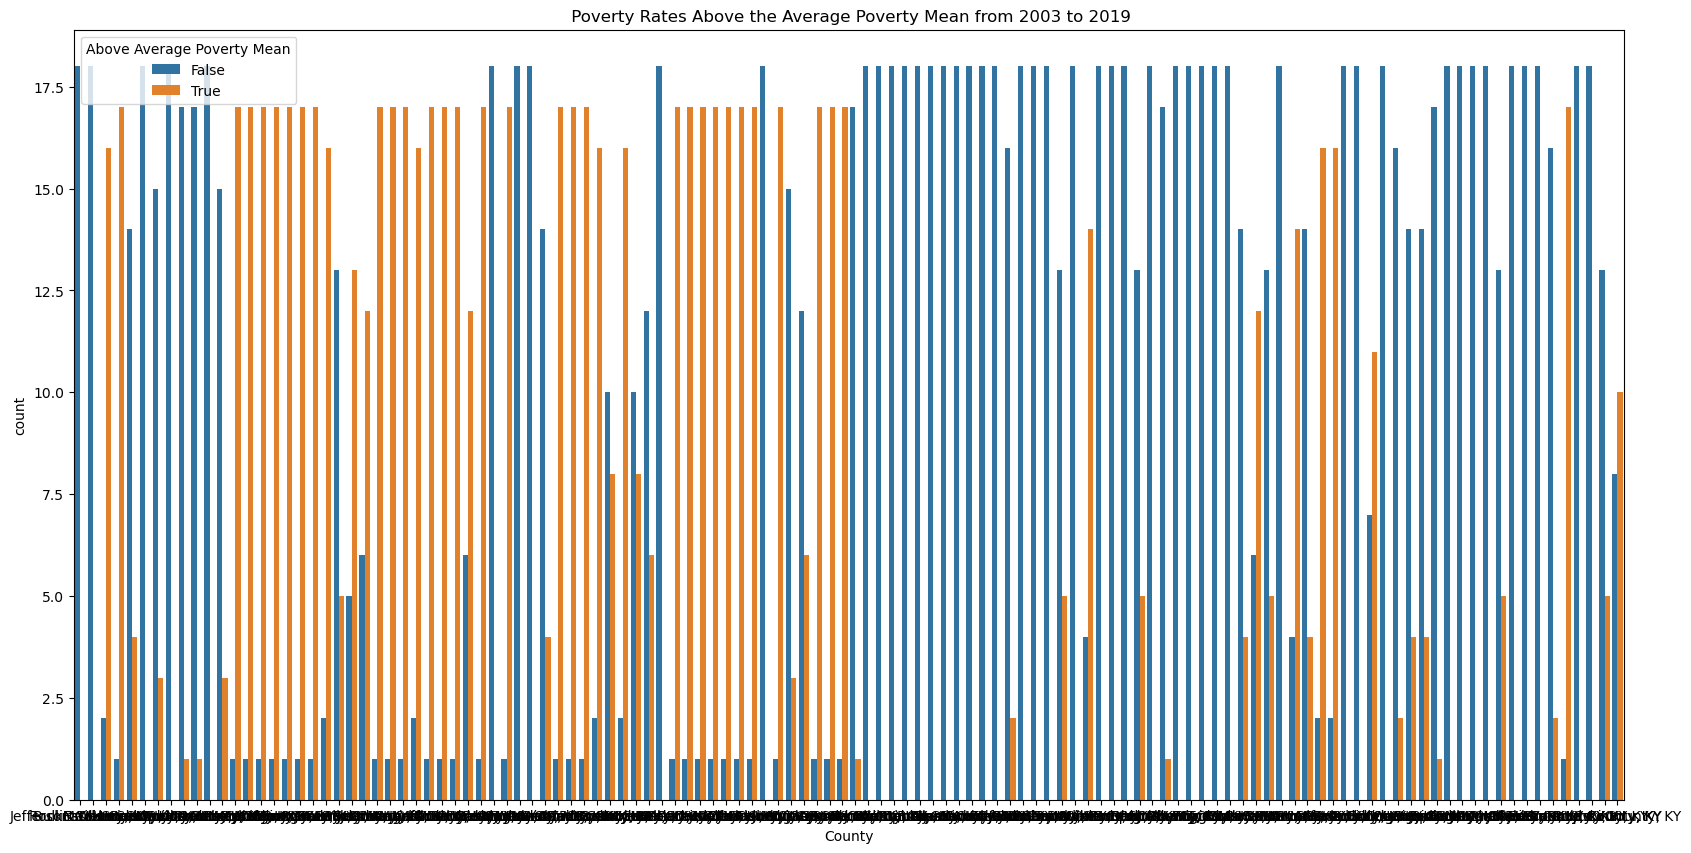

In [ ]:
plt.figure(figsize=(20, 10))

sns.countplot(x= 'County', 
              hue='Above Average Poverty Mean', 
              data=kentucky, 
              order = kentucky['County'].value_counts().index)

plt.title(' Poverty Rates Above the Average Poverty Mean from 2003 to 2019')

plt.show()

# Create readable values for machine learning model

In [ ]:
pov_map = {True : 1, False : 0}

kentucky['Above Average Poverty Mean'] = kentucky['Above Average Poverty Mean'].map(pov_map)

In [ ]:
num_true_kentucky = len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 1])
num_false_kentucky = len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 0])

print("Number of True cases for Kentucky: {0} ({1:2.2f}%)".format(num_true_kentucky, (num_true_kentucky/ (num_true_kentucky + num_false_kentucky)) * 100))
print("Number of False cases for Kentucky: {0} ({1:2.2f}%)".format(num_false_kentucky, (num_false_kentucky/ (num_true_kentucky + num_false_kentucky)) * 100))

Number of True cases for Kentucky: 839 (38.84%)
Number of False cases for Kentucky: 1321 (61.16%)


# Split the data for learning model and testing model

In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Wages and Salary per Capita', 'Government Transfers per Capita', 'Medicare Transfers per Capita', 'Share of Population 65+', 'Total Population', 'Medicaid Transfers per Capita', 'Unemployment Rate']
predicted_class_name = ['Above Average Poverty Mean']

X = kentucky[feature_col_names].values
y = kentucky[predicted_class_name].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(kentucky.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(kentucky.index)) * 100))

70.00% in training set
30.00% in test set


In [ ]:
print("Original True  : {0} ({1:0.2f}%)".format(len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 1]), (len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 1])/len(kentucky.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 0]), (len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 0])/len(kentucky.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 839 (38.84%)
Original False : 1321 (61.16%)

Training True  : 595 (39.35%)
Training False : 917 (60.65%)

Test True      : 244 (37.65%)
Test False     : 404 (62.35%)


# Naive Bayes Model application

In [ ]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.6442


In [ ]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.6420


In [ ]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[191 213]
 [ 19 225]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.47      0.62       404
           1       0.51      0.92      0.66       244

    accuracy                           0.64       648
   macro avg       0.71      0.70      0.64       648
weighted avg       0.76      0.64      0.64       648

